This notebook uses riveter Rashkin's sentiment frames to identify and extract the subjects, verbs, and direct objects in comments and analyze the sentiment towards some certain persona.

**Load the data**

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/content/gdrive/MyDrive/reddit/reddit_comments.csv', encoding='utf-8', index_col=0, sep=';')

In [56]:
#create the comment_id column
df.reset_index(drop=True, inplace=True)
df['comment_id'] = df.index
df.head()

,comments,comment_id
0,Idk what ya’ll are mad about. I’m pretty excit...,0
1,Can't wait to see a crippled Levi fighting din...,1
2,Can't wait for when Bellen Kristein would figh...,2
3,Honestly speaking I wouldn't mind reading it (...,3
4,"Beren is stunning, the ending is bad.\nReasons...",4


**Install Riveter**

In [7]:
colab_directory_path = '/content/gdrive/MyDrive/riveter-test'

In [8]:
%mkdir /content/gdrive/MyDrive/riveter-test

mkdir: cannot create directory ‘/content/gdrive/MyDrive/riveter-test’: File exists


In [9]:
%cd /content/gdrive/MyDrive/riveter-test

/content/gdrive/MyDrive/riveter-test


In [10]:
! git clone https://github.com/maartensap/riveter-nlp.git

fatal: destination path 'riveter-nlp' already exists and is not an empty directory.


In [11]:
%ls

riveter-nlp/


In [12]:
%cd /content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter

/content/gdrive/MyDrive/riveter-test/riveter-nlp/riveter


In [ ]:
pip install spacy

In [ ]:
!pip install -U spacy-experimental

In [ ]:
!pip install https://github.com/explosion/spacy-experimental/releases/download/v0.6.0/en_coreference_web_trf-3.4.0a0-py3-none-any.whl#egg=en_coreference_web_trf

In [ ]:
!python -m spacy download en_core_web_sm

**Import libraries**

In [16]:
from collections import defaultdict
import os
import pandas as pd
import random
from riveter import Riveter

import seaborn as sns
import matplotlib.pyplot as plt

**Load rashkin lexicon and Train the model**

In [25]:
#use reshkin lexicon to train the model
comments = df['comments']
comment_id = df['comment_id']

riveter = Riveter()
riveter.load_rashkin_lexicon('effect')

riveter.train(comments,
              comment_id,)

100%|██████████| 195/195 [07:37<00:00,  2.35s/it]

2024-04-29 23:19:25 Complete!


In [38]:
#get the number of entities that matched at least 10 verbs
persona_score_dict = riveter.get_score_totals(frequency_threshold=10)
len(persona_score_dict)

14

**Get the socre for each entity**

In [40]:
#print the score of entities that matched at least 10 verbs
for _persona, _score in sorted(persona_score_dict.items(), key=lambda x: x[1], reverse=True):
    print(round(_score, 2), '\t', _persona)

0.31 	 sense
0.26 	 we
0.14 	 you
0.09 	 people
0.08 	 i
0.07 	 story
0.06 	 they
0.06 	 mikasa
0.05 	 he
0.04 	 ending
0.04 	 this
0.04 	 it
0.02 	 eren
-0.0 	 ymir


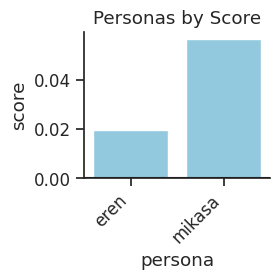

In [54]:
# We can compare the score for different personas, and visualize the result. 
# Here we compare the score for the main male character 'eren' and the main female character 'mikasa'.
riveter.plot_scores(title='Personas by Score', target_personas=['eren', 'mikasa'], figsize=(3, 3))

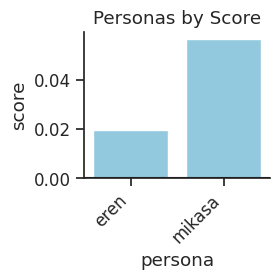

In [54]:
# We can compare the score for different personas, and visualize the result. 
# Here we compare the score for the main male character 'eren' and the main female character 'mikasa'.
riveter.plot_scores(title='Personas by Score', target_personas=['eren', 'mikasa'], figsize=(3, 3))

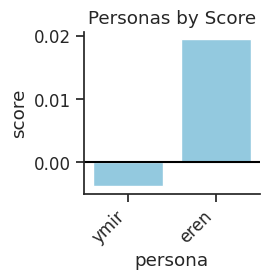

In [55]:
# The comparision between 'eren' and 'ymir'
riveter.plot_scores(title='Personas by Score', target_personas=['eren', 'ymir'], figsize=(3, 3))

**Get verb polarity for scores**

In [42]:
#Check all the contributing verbs for each persona and whether they contributed positively or negatively.
#First, we see the postive and negative contributing verbs about 'ending'
persona_polarity_verb_count_dict['ending']

defaultdict(<function riveter.default_dict_int()>,
            {'positive': defaultdict(int,
                         {'enjoy_dobj': 1,
                          'like_dobj': 8,
                          'give_nsubj': 1,
                          'care_nsubj': 1,
                          'give_dobj': 1,
                          'read_dobj': 4,
                          'want_dobj': 1,
                          'love_dobj': 1,
                          'own_dobj': 1,
                          'prepare_dobj': 1}),
             'negative': defaultdict(int,
                         {'hate_dobj': 3,
                          'make_nsubj': 3,
                          'end_dobj': 1,
                          'survive_dobj': 1})})

In [31]:
# We can also see the postive and negative contributing verbs about the main character 'eren'
persona_polarity_verb_count_dict['eren']

defaultdict(<function riveter.default_dict_int()>,
            {'positive': defaultdict(int,
                         {'win_nsubj': 1,
                          'protect_dobj': 1,
                          'complete_nsubj': 1,
                          'have_nsubj': 3,
                          'get_nsubj': 1,
                          'remember_nsubj': 1,
                          'realize_nsubj': 1,
                          'explain_dobj': 1,
                          'command_nsubj': 1,
                          'achieve_dobj': 1,
                          'save_dobj': 2,
                          'say_nsubj': 1,
                          'forgive_dobj': 1,
                          'go_nsubj': 1,
                          'love_dobj': 1,
                          'give_dobj': 1,
                          'give_nsubj': 1,
                          'keep_nsubj': 1,
                          'trust_dobj': 1,
                          'witness_dobj': 1,
                          'than

In [32]:
#the postive and negative contributing verbs about the character 'ymir'
persona_polarity_verb_count_dict['ymir']

defaultdict(<function riveter.default_dict_int()>,
            {'negative': defaultdict(int,
                         {'rip_dobj': 1,
                          'surround_dobj': 1,
                          'destroy_dobj': 1,
                          'undermine_dobj': 1,
                          'kill_dobj': 1,
                          'lose_dobj': 1,
                          'abuse_dobj': 1}),
             'positive': defaultdict(int,
                         {'see_nsubj': 1,
                          'keep_nsubj': 1,
                          'return_nsubj': 1,
                          'go_nsubj': 1,
                          'remain_nsubj': 2,
                          'serve_dobj': 2,
                          'know_nsubj': 1,
                          'free_dobj': 2,
                          'show_dobj': 1,
                          'want_nsubj': 1})})

In [43]:
#the postive and negative contributing verbs about the character 'mikasa'
persona_polarity_verb_count_dict['mikasa']

defaultdict(<function riveter.default_dict_int()>,
            {'positive': defaultdict(int,
                         {'make_dobj': 2,
                          'free_nsubj': 1,
                          'dedicate_nsubj': 1,
                          'have_nsubj': 1,
                          'help_nsubj': 1,
                          'dedicate_dobj': 1,
                          'uphold_dobj': 1,
                          'take_dobj': 1}),
             'negative': defaultdict(int, {'kill_nsubj': 1})})

**Draw the heatmap**

We can view these scores visually for each persona. In the following heatmap, each cell contains the count of matching verbs for the persona that contributed either positively or negatively to its final score.

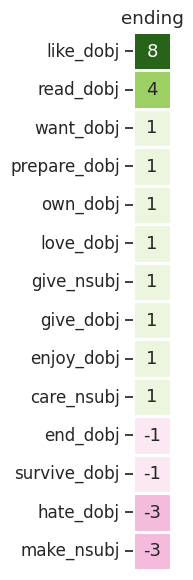

In [45]:
riveter.plot_verbs_for_persona('ending', figsize=(2,6))

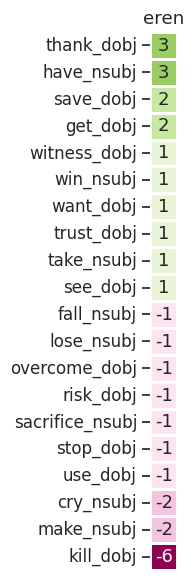

In [34]:
riveter.plot_verbs_for_persona('eren', figsize=(2,6))

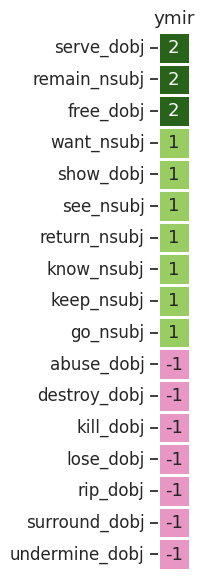

In [36]:
riveter.plot_verbs_for_persona('ymir', figsize=(2,6))

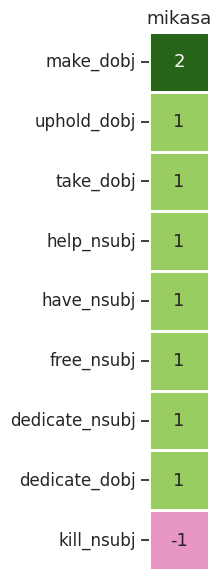

In [44]:
riveter.plot_verbs_for_persona('mikasa', figsize=(2,6))

**Words or names clustered together for each persona**

We can also see what words or names have been clustered together for each persona.

In [46]:
# get the word cluster about 'eren'
riveter.get_persona_cluster('eren')

{'eren wins': 1,
 'eren loses': 1,
 "eren responsible for his mother's death is": 1,
 'his mother': 2,
 "eren's best": 1,
 'i do': 1,
 'his character': 1,
 'eg eren': 1,
 "eren's": 3,
 'my enemies': 1,
 'he does': 1,
 'eren rumbles': 1,
 'his primary': 1,
 'eren': 10,
 'eren not': 1,
 'him when': 1,
 'eren or': 1,
 'eren did': 8,
 'eren could': 2,
 'eren admits': 1,
 'he strongly': 1,
 'he did': 12,
 'eren’s': 1,
 'his compulsive': 1,
 'he had': 3,
 'his underlying': 1,
 'marley’s fall': 1,
 'the marleyan uses': 1,
 'marley killed': 1,
 'marley that': 1,
 'marley is': 1,
 'reiner became': 1,
 'he overcame': 1,
 'his regrets': 1,
 'he’s': 2,
 'jean.': 1,
 'jean got': 1,
 'he remembered': 1,
 'he empathized': 1,
 'reiner.': 1,
 'he realized': 1,
 'jean’s feelings': 1,
 'him struggle': 1,
 'eren sent': 2,
 'his mom': 1,
 'eren made': 2,
 'he was': 8,
 'he commanded': 1,
 'his own': 3,
 'his goals': 1,
 'eren will': 1,
 'he can': 1,
 'eren and': 7,
 'he uses': 1,
 'eren controlling': 1,
 '

In [47]:
# get the word cluster about 'mikasa'
riveter.get_persona_cluster('mikasa')

{'mikasa to': 3,
 'her choice': 2,
 'mikasa"': 1,
 'mikasa finding': 2,
 'mikasa': 7,
 'mikasa and ymir respectively': 1,
 'their mindsets': 1,
 'they ultimately': 1,
 'they loved': 1,
 'mikasa freed': 1,
 'mikasa showed': 1,
 'mikasa dedicated': 1,
 'herself to': 1,
 'she was': 1,
 'she chose': 3,
 'mikasa had': 1,
 'her values': 1,
 'she loved': 1,
 'her actions': 1,
 'i do': 1,
 'ymir’s': 1,
 'mikasa killing': 2,
 'she finally': 2,
 'she has': 1,
 'mikasa,': 2,
 'mikasa needed': 1,
 'mikasa?': 1,
 'mikasa somewhere': 1,
 'mikasa share': 1,
 'mikasa take': 1,
 'her love': 1}

In [53]:
# get the word cluster about 'ymir'
riveter.get_persona_cluster('ymir')

{'ymir loving': 2,
 "she's": 1,
 'her motivations': 1,
 'she could': 2,
 'him apart': 1,
 'ymir had': 2,
 'she envied': 1,
 'ymir’s “': 1,
 'her life': 1,
 'ymir’s flashback': 1,
 'ymir is': 2,
 'her behavior': 1,
 'she rightiously': 1,
 'she is': 1,
 'she does': 1,
 'she sees': 1,
 'ymir ca': 1,
 "ymir's story": 1,
 'ymir.': 1,
 'ymir freeing': 1,
 "ymir's actions": 1,
 'he did': 3,
 "eren's power": 1,
 'he could': 1,
 'he keeps': 1,
 'he has': 1,
 "eren's intentions": 1,
 'his enemies(90': 1,
 'his character': 1,
 "eren's motives": 1,
 'eren,': 1,
 'eren/': 1,
 "he's": 1,
 'his love': 1,
 'his mind': 1,
 'his life': 1,
 'he broke': 1,
 "i'm": 1,
 'my friends': 1,
 'i do': 1,
 'he so': 1,
 'she’s': 1,
 'she returns': 1,
 'her.': 2,
 'ymir demonstrates': 1,
 'ymir goes': 1,
 'ymir desired': 2,
 'she was': 8,
 'her useful': 2,
 'her remaining': 2,
 'her descendants': 2,
 'her death': 2,
 'she wanted': 2,
 'her husband': 2,
 'this ymir 2.0 might': 2,
 'they are': 2,
 'ymir': 2,
 'ymir fr